In [1]:
pip install finterstellar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 24.0 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [2]:
import finterstellar as fs

In [4]:
otp = '16620193411099710310'
df = fs.fn_single(otp=otp, symbol='GS', window='T')

In [5]:
df['Gross Margin'] = df['Gross Profit'] / df['Revenue']
df['Operating Margin'] = df['Operating Income'] / df['Revenue']
df['Profit Margin'] = df['Net Income'] / df['Revenue']

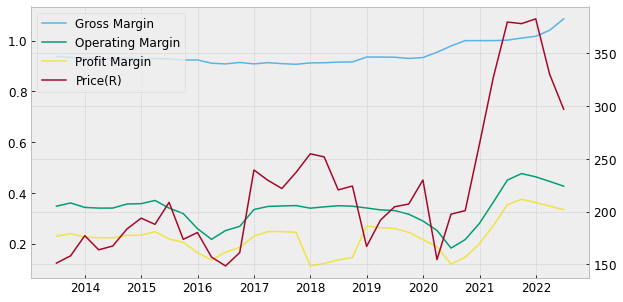

In [6]:
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

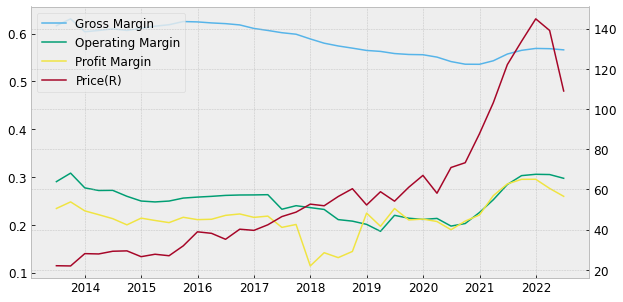

In [8]:
df = fs.fn_single(otp=otp, symbol='GOOGL', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue']
df['Operating Margin'] = df['Operating Income'] / df['Revenue']
df['Profit Margin'] = df['Net Income'] / df['Revenue']
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

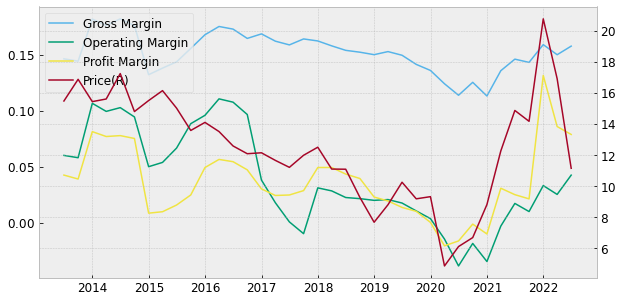

In [10]:
df = fs.fn_single(otp=otp, symbol='F', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue']
df['Operating Margin'] = df['Operating Income'] / df['Revenue']
df['Profit Margin'] = df['Net Income'] / df['Revenue']
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

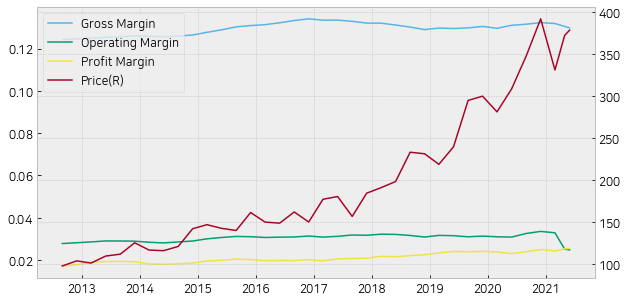

In [ ]:
df = fs.fn_single(otp='OTP', symbol='COST', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue']
df['Operating Margin'] = df['Operating Income'] / df['Revenue']
df['Profit Margin'] = df['Net Income'] / df['Revenue']
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

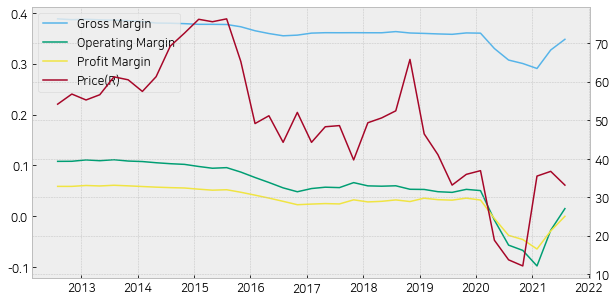

In [ ]:
df = fs.fn_single(otp='OTP', symbol='JWN', window='T')
df['Gross Margin'] = df['Gross Profit'] / df['Revenue']
df['Operating Margin'] = df['Operating Income'] / df['Revenue']
df['Profit Margin'] = df['Net Income'] / df['Revenue']
fs.draw_chart(df, left=['Gross Margin', 'Operating Margin', 'Profit Margin'], right='Price')

2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 16.90%
Accumulated return: 377.24%
Investment period: 10.0yrs
Sharpe ratio: 1.25
MDD: -30.14%


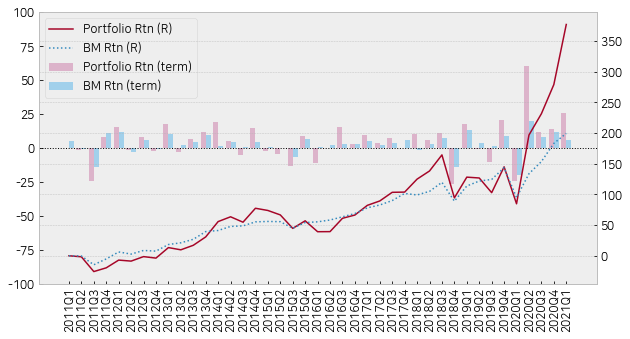

In [ ]:
# Gross Margin
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue'] * 100
    data[t]['Operating Margin'] = data[t]['Operating Income'] / data[t]['Revenue'] * 100
    data[t]['Profit Margin'] = data[t]['Net Income'] / data[t]['Revenue'] * 100
    s[t] = fs.fn_filter(data[t], by='Gross Margin', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

In [11]:
sector_info = fs.sector_info(data['2020Q3'])
sector_info

NameError: ignored

In [ ]:
print(fs.sector_filter(df=data['2020Q4'], sector=['Technology']))

          term    Revenue       COGS  Gross Profit      SG&A  \
symbol                                                         
AAOI    2020Q4     234.62     184.08         50.54     55.99   
AAPL    2020Q4 294,135.00 180,068.00    114,067.00 20,350.00   
ACIW    2020Q4   1,294.32     622.46        671.86    256.04   
ACLS    2020Q4     474.56     275.98        198.58     78.71   
ACMR    2020Q4     156.62      87.03         69.60     28.99   
...        ...        ...        ...           ...       ...   
ZI      2020Q4     476.20      84.20        392.00    247.70   
ZIXI    2020Q4     218.48     112.76        105.72     78.34   
ZM      2020Q4   1,957.13     587.25      1,369.88    823.22   
ZS      2020Q4     480.26     107.90        372.36    397.32   
ZUO     2020Q4     296.53     132.78        163.74    166.79   

        Operating Income  Net Income   EPS    EBITDA      EBIT  ...  Price  \
symbol                                                          ...          
AAOI       

In [ ]:
for t in terms:
    data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue'] * 100
    data[t]['Operating Margin'] = data[t]['Operating Income'] / data[t]['Revenue'] * 100
    data[t]['Profit Margin'] = data[t]['Net Income'] / data[t]['Revenue'] * 100

In [ ]:
filtered = fs.sector_filter(df=data['2020Q4'], sector=['Technology'])
print(filtered[['sector','Gross Margin','Operating Margin','Profit Margin']])

            sector  Gross Margin  Operating Margin  Profit Margin
symbol                                                           
AAOI    Technology         21.54            -20.82         -24.91
AAPL    Technology         38.78             25.24          21.73
ACIW    Technology         51.91             11.18           5.61
ACLS    Technology         41.85             12.23          10.53
ACMR    Technology         44.44             13.72          11.99
...            ...           ...               ...            ...
ZI      Technology         82.32              7.79          -3.15
ZIXI    Technology         48.39              2.09          -7.07
ZM      Technology         69.99             21.17          21.72
ZS      Technology         77.53            -28.81         -31.87
ZUO     Technology         55.22            -26.87         -26.35

[475 rows x 4 columns]


2010Q4...OK
2011Q1...OK
2011Q2...OK
2011Q3...OK
2011Q4...OK
2012Q1...OK
2012Q2...OK
2012Q3...OK
2012Q4...OK
2013Q1...OK
2013Q2...OK
2013Q3...OK
2013Q4...OK
2014Q1...OK
2014Q2...OK
2014Q3...OK
2014Q4...OK
2015Q1...OK
2015Q2...OK
2015Q3...OK
2015Q4...OK
2016Q1...OK
2016Q2...OK
2016Q3...OK
2016Q4...OK
2017Q1...OK
2017Q2...OK
2017Q3...OK
2017Q4...OK
2018Q1...OK
2018Q2...OK
2018Q3...OK
2018Q4...OK
2019Q1...OK
2019Q2...OK
2019Q3...OK
2019Q4...OK
2020Q1...OK
2020Q2...OK
2020Q3...OK
2020Q4...OK
CAGR: 17.01%
Accumulated return: 381.71%
Investment period: 10.0yrs
Sharpe ratio: 1.68
MDD: -19.53%


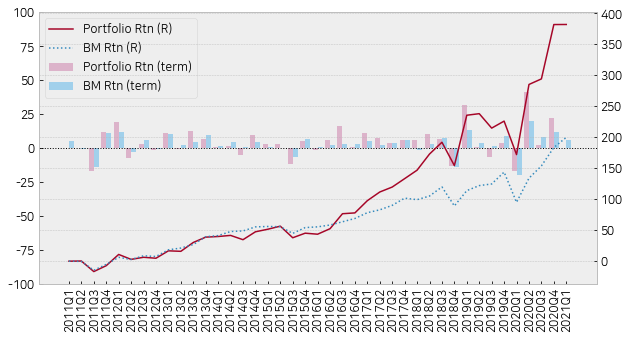

In [ ]:
# Gross Margin
terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
data = {}
for t in terms:
    data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['Gross Margin'] = data[t]['Gross Profit'] / data[t]['Revenue'] * 100  
    s[t] = fs.sector_filter(df=data[t], sector=['Technology'])
    s[t] = fs.fn_filter(s[t], by='Gross Margin', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df)

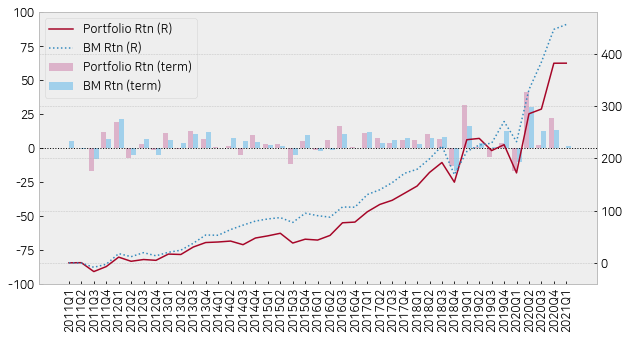

In [ ]:
fs.draw_return(df, bm='QQQ')

CAGR: 14.78%
Accumulated return: 297.24%
Investment period: 10.0yrs
Sharpe ratio: 1.38
MDD: -23.33%


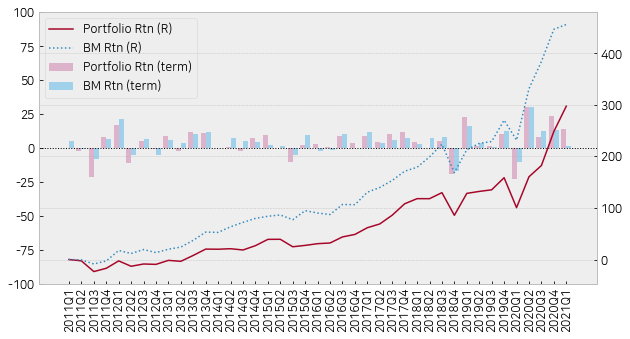

In [ ]:
# Operating Margin
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['Operating Margin'] = data[t]['Operating Income'] / data[t]['Revenue'] * 100
    s[t] = fs.sector_filter(df=data[t], sector=['Technology'])
    s[t] = fs.fn_filter(s[t], by='Operating Margin', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df, bm='QQQ')

CAGR: 16.03%
Accumulated return: 342.72%
Investment period: 10.0yrs
Sharpe ratio: 1.59
MDD: -22.26%


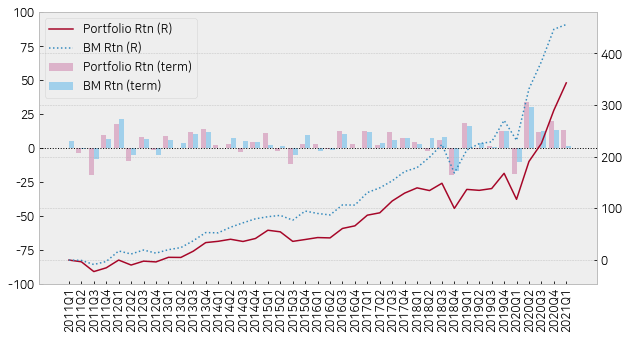

In [ ]:
# Net Profit Margin
# terms = fs.set_terms(trade_start='2011Q1', trade_end='2021Q1')
# data = {}
# for t in terms:
#     data[t] = fs.fn_consolidated(otp='OTP', term=t)
s = {}
signal = {}
for t in terms:
    data[t]['Profit Margin'] = data[t]['Net Income'] / data[t]['Revenue'] * 100
    s[t] = fs.sector_filter(df=data[t], sector=['Technology'])
    s[t] = fs.fn_filter(s[t], by='Profit Margin', floor=0, n=30, asc=False)
    signal[t] = list(s[t].index)
df = fs.backtest(signal=signal, data=data, m=3, cost=.001)
fs.draw_return(df, bm='QQQ')